In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Wild Blueberry Yield Predction

### Abstract:

A number of research is underway in the agricultural sector to better predict crop yield using machine learning algorithms. Many machine learning algorithms require large amounts of data in order to give useful results. One of the major challenges in training and experimenting with machine learning algorithms is the availability of training data in sufficient quality and quantity remains a limiting factor. In the paper, “Wild blueberry yield prediction using a combination of computer simulation and machine learning algorithms” [1], we used dataset generated by the Wild Blueberry Pollination Model,  a spatially explicit simulation model validated by field observation and experimental data collected in Maine USA during the last 30 years [2]. The blueberry yields predictive models require data that sufficiently characterize the influence of plant spatial traits, bee species composition, and weather conditions on production. In a multi-step process, we designed simulation experiments and conducted the runs on the calibrated version of the blueberry simulation model. The simulated dataset was then examined, and important features were selected to build four machine-learning-based predictive models. This simulated data provides researchers who have actual data collected from field observation and those who wants to experiment the potential of machine learning algorithms response to real data and computer simulation modelling generated data as input for crop yield prediction models.

Specifications table:

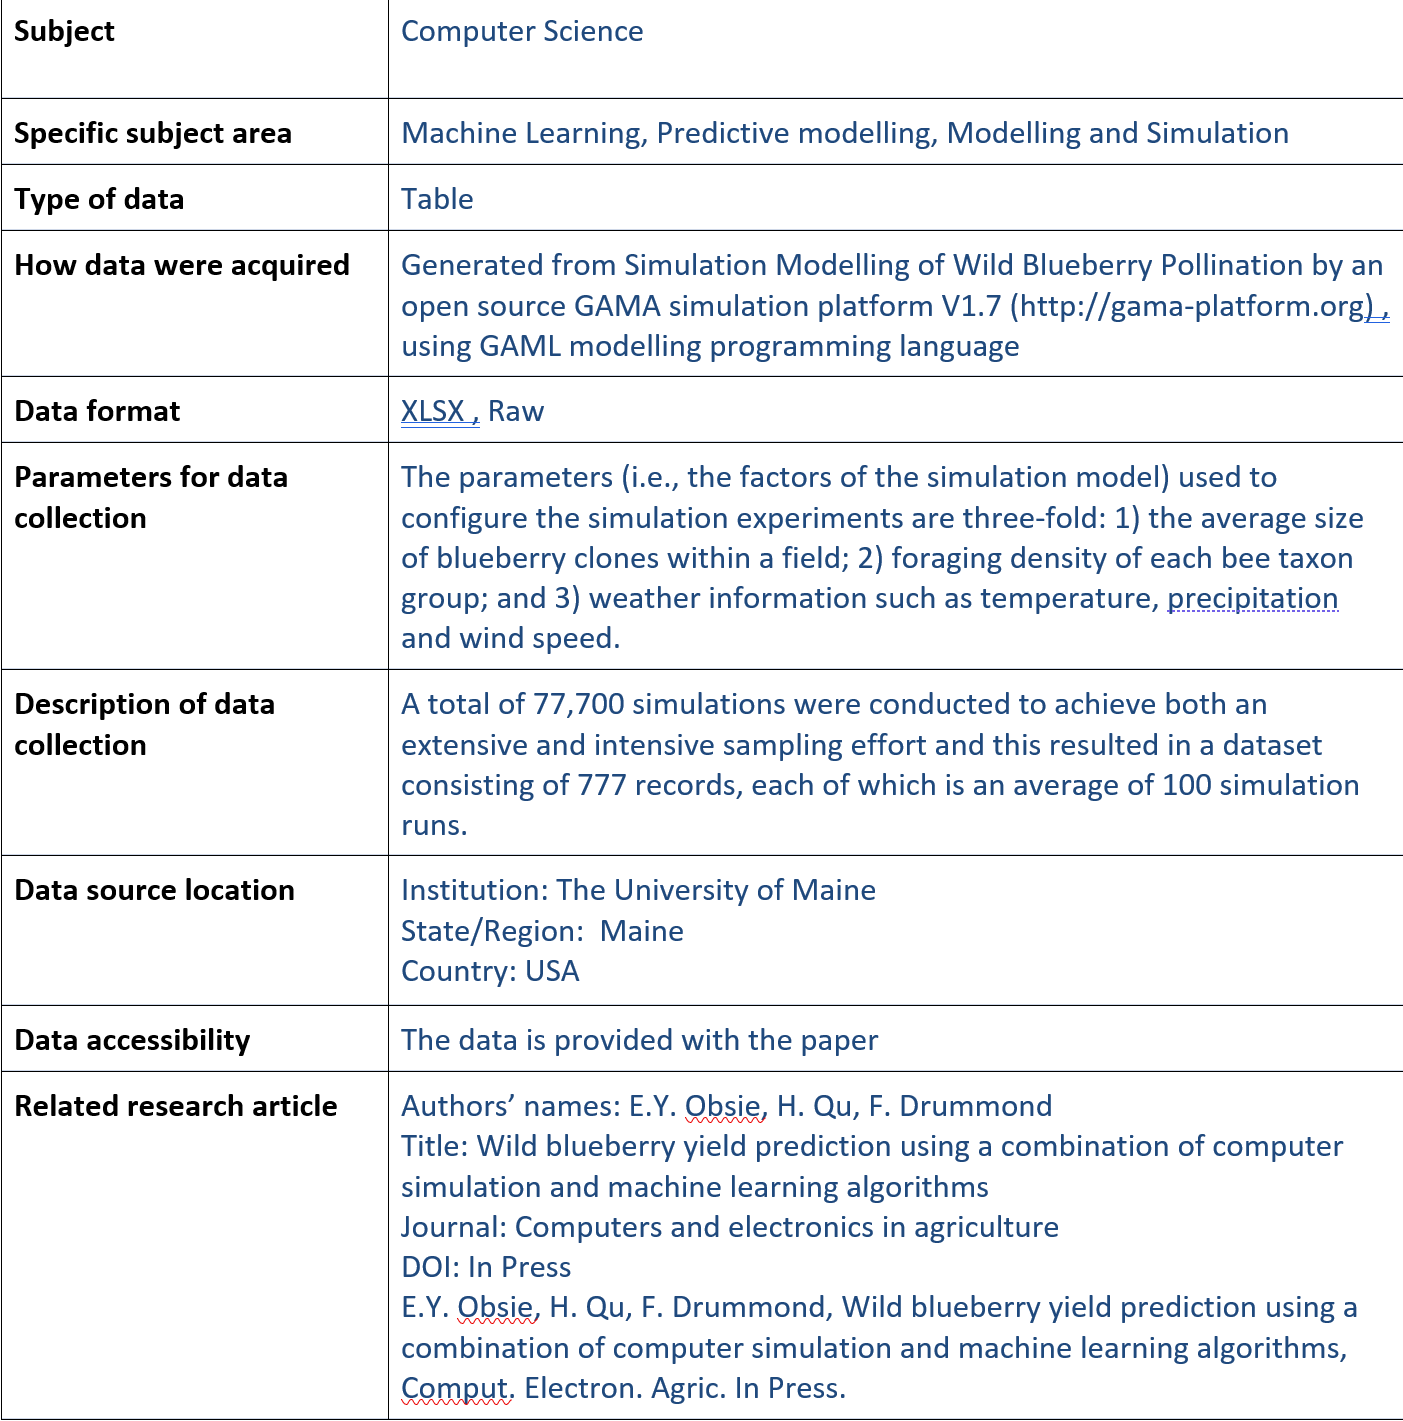


### Introduction:
The dataset used for predictive modelling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program, that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches. This simulated data provides researchers who have actual data collected from field observation and those who wants to experiment the potential of machine learning algorithms response to real data and computer simulation modelling generated data as input for crop yield prediction models.


Specifications table:
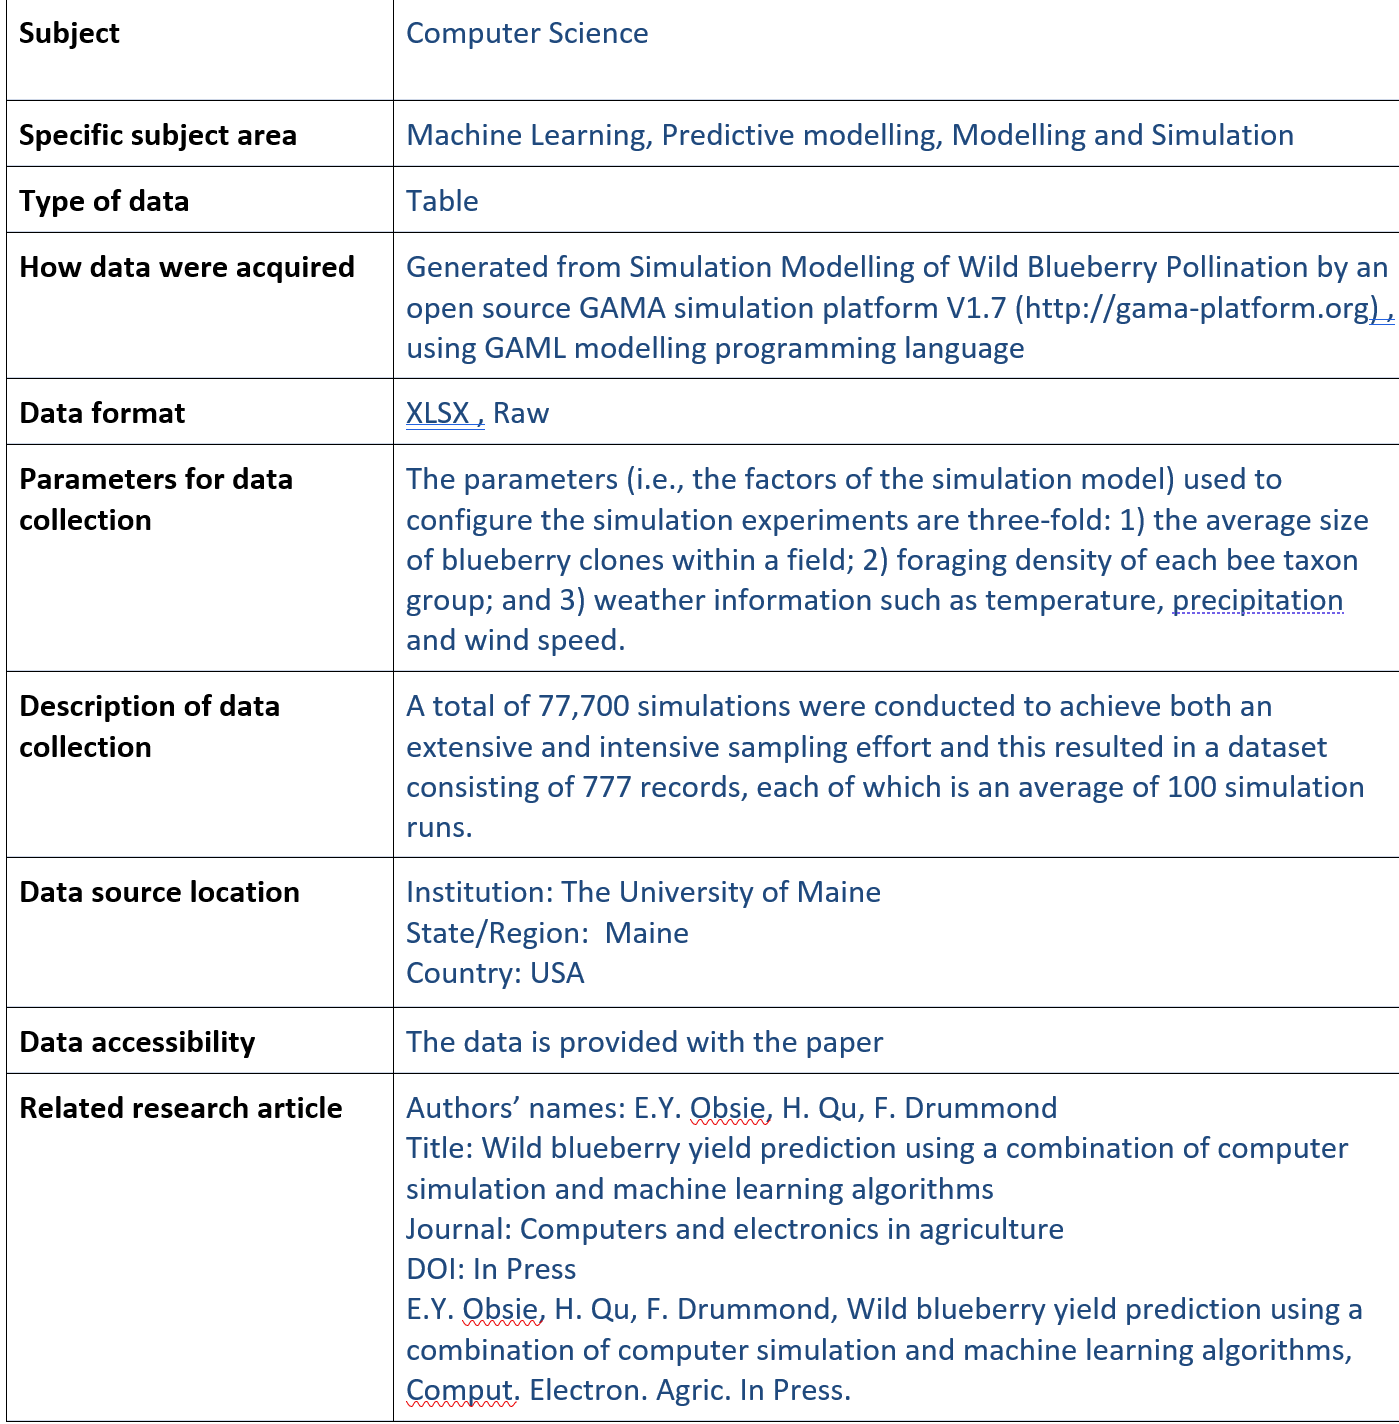

Value of the Data:

* The dataset provides useful information on wild blueberry plant spatial traits, bee species composition and weather conditions. Therefore, it enables researchers to build machine learning models for early prediction of blueberry yield. 
* This dataset can be essential for other researchers who have field observation data but wants to test and evaluate the performance of different machine learning algorithms by comparing use of real data against computer simulation generated data as input in crop yield prediction.  
* Researchers can use this dataset to benchmark wild blueberry crop yield prediction models comparing to results already known. 
* Educationalists at different level can use the dataset for training machine learning classification or regression problems.


### Problem Statement:
 The target feature is yield which is a continuous variable. The task is to classify the 'yield' based on the other 17 features. The evaluation metrics will be RMSE score.

### About the dataset:

The dataset used for predictive modelling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program (Figure 1) that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years [2] and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches.
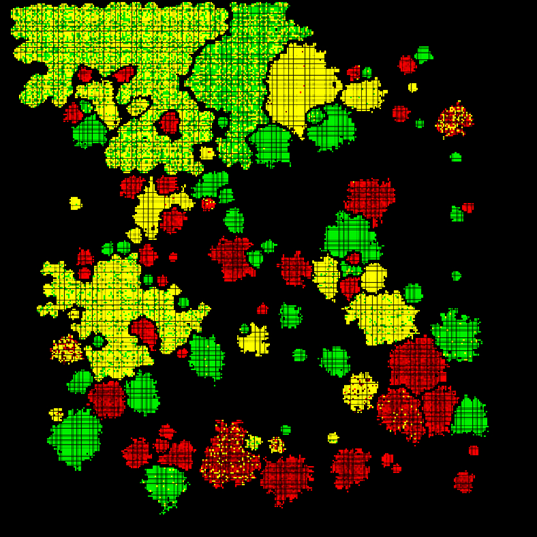

Figure 1. A simulated wild blueberry field on Julian date 136 of the production season. The green dots are quadrats in which stems are in bud (before bloom) stage, yellow dots are quadrats in which stems are in bloom, red dots are quadrats in which flowers on stems have become fruit (after bloom). Mixed yellow (flower) and green (bud) stem show the pattern of successive waves of flowering within a clone. Red stems with different color saturation indicate the percentage of fruit set, i.e., bright red stems have higher fruit set than the dark red ones. Black area are bare spots in the field caused by herbicide applications and erosion [2].
This article presents the dataset of 777 records. The data is associated with the article [1]. A detailed description of the extracted features is shown in Table 1.

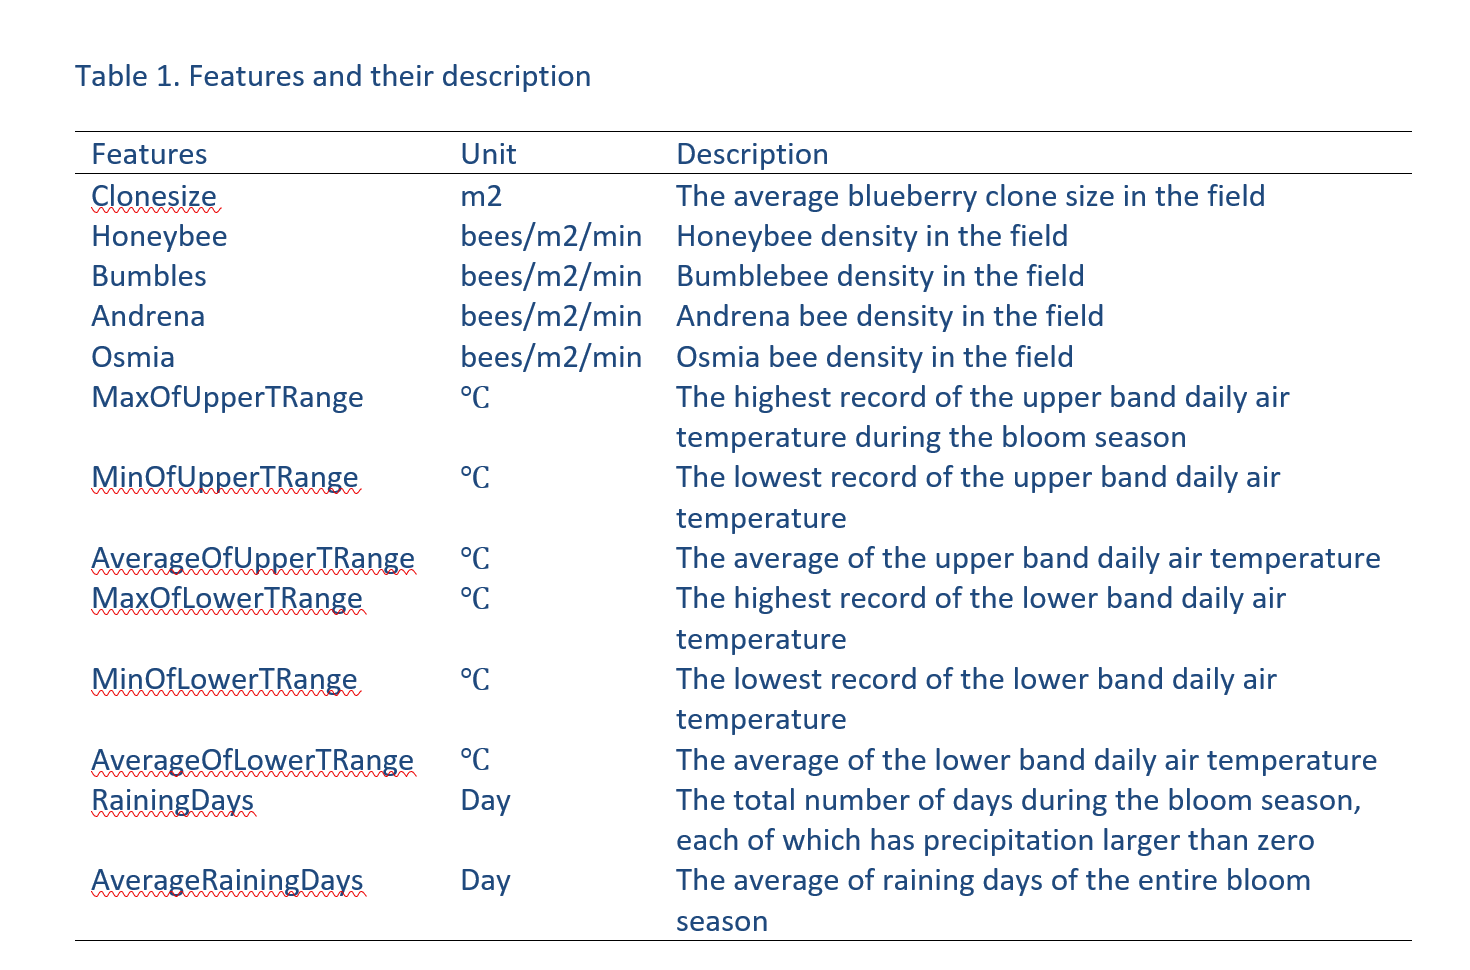

An initial investigation of the simulation derived data was conducted to determine distributional patterns described by a statistical summary (Table 2).
Table 2. Field spatial traits, bee species composition and weather variables associated with wild blueberry yield (minimum, maximum, mean, std. deviation, and correlation coefficient r) in the simulated dataset.

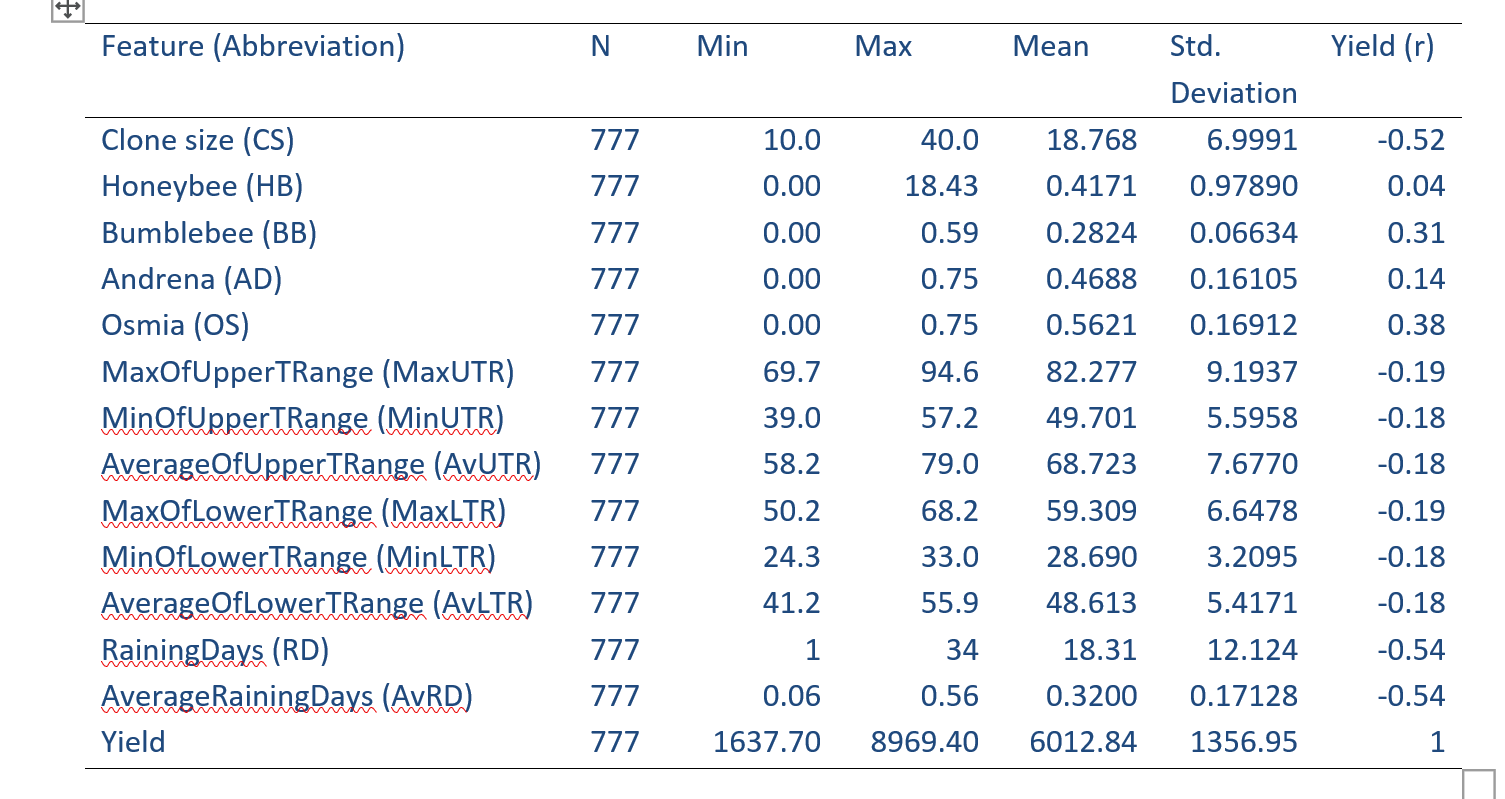




In [32]:
### Importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score



!pip install dabl
import dabl

pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False



import warnings
warnings.filterwarnings('ignore')

In [33]:
#importing the dataset
data=pd.read_csv('../input/wild-blueberry-yield-prediction/Data in Brief/Data in Brief/WildBlueberryPollinationSimulationData.csv')
data.head()

In [34]:
data.shape

In [35]:
data.info()

> There are no categorical variables in the dataset.

In [36]:
# Checking the missing values
data.isnull().sum()

> There are no missing values in the dataset.

In [37]:
#check for duplicated values
data.duplicated().sum()

> There are no duplicate values in the dataset

In [38]:
# chacking the statistical value

data.describe().T

> Deleting the 'row' column as there is no relevance in the dataset

In [39]:
data.drop('Row#', axis='columns', inplace=True)


In [40]:
data

In [41]:
data.nunique()

In [42]:
#EDA using dabl
dabl.plot(data, target_col="yield")

In [43]:

plt.figure(figsize=(20,20))
c = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Understanding the Correlation between Input Data by a Heatmap', fontsize=15)
plt.show()

In [44]:
data.columns

In [45]:

features =['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds','yield'] 


In [46]:
mask = np.zeros_like(data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [47]:
# checking the unique values in all columns to have a better understanding of data.

for col in list(data):
    print(col)
    print(data[col].unique())

In [48]:

features =['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'] 

x= data[features]
y= data['yield']
print(x.shape)
print(y.shape)

In [49]:
# Splitting the data to test and train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print (X_train.shape)
print(y_train.shape)
print (X_test.shape)
print( y_test.shape)





### Model Building

### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model1=reg.fit(X_train, y_train)
pred_linear = reg.predict(X_test)



In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt




In [52]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, pred_linear)

print('R2 Score: %.3f' % rsq_linear)
print('Mean Square Error: %.3f' % mse_linear)
print('Mean Absolute Error: %.3f' % mae_linear)
print('Root Mean Square Error: %.3f' % rmse_linear)



### Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Defining the model and stating the random state to 1
rf_model = RandomForestRegressor(random_state=1)

# fitting the model
rf_model.fit(X_train, y_train)
pred_rf=rf_model.predict(X_test)
#pred_rf=pred_rf.reshape(151,1)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, pred_rf)

print('R2 Score: %.3f' % rsq_rf)
print('Mean Square Error: %.3f' % mse_rf)
print('Mean Absolute Error: %.3f' % mae_rf)
print('Root Mean Square Error: %.3f' % rmse_rf)


### Decision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)
pred_dtree = dtree_reg.predict(X_test)

mae_dtree = mean_absolute_error(y_test, pred_dtree)
mse_dtree = mean_squared_error(y_test, pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
rsq_dtree = r2_score(y_test, pred_dtree)

print('R2 Score: %.3f' % rsq_dtree)
print('Mean Square Error: %.3f' % mse_dtree)
print('Mean Absolute Error: %.3f' % mae_dtree)
print('Root Mean Square Error: %.3f' % rmse_dtree)


### XG Boost

In [55]:
import xgboost
from xgboost import XGBRegressor


xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test) 

mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)

print('R2 Score: %.3f' % rsq_xgb)
print('Mean Square Error: %.3f' % mse_xgb)
print('Mean Absolute Error: %.3f' % mae_xgb)
print('Root Mean Square Error: %.3f' % rmse_xgb)


### Model Evaluation

In [56]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dtree,
        "rmse": rmse_dtree,
        'r2': rsq_dtree*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3], 
                 sns.color_palette("pastel")[4]]);


In [62]:
 
rmse_values = [['Linearegression',rmse_linear],['Randomforest',rmse_rf],[ 'Decisiontree',rmse_dtree],['Xgboost', rmse_xgb]]
rmse_df = pd.DataFrame(rmse_values, columns=['Models', 'RMSE scores'])  
rmse_df

In [63]:
sns.barplot(data=rmse_df, y="RMSE scores", x="Models",palette="flare")
plt.xticks(rotation=90)


### Since Linear Regression has low RMSE value,proceeding with linear regression model

In [57]:
# explore residual
residual = y_test - pred_linear
sns.distplot(residual)
sns.scatterplot(y_test,pred_linear)
plt.scatter(y_test,y_test)
plt.xlabel("Real Values")
plt.ylabel("predicted values")



In [58]:
# Coeffecient of model
coeffecients = pd.DataFrame(model1.coef_,x.columns)
coeffecients.head()

In [65]:
cross_val_score(reg,x,y,cv=10,scoring='r2').mean()

In [67]:
#from statsmodels.regression.linear_model import OLS
#import statsmodels.regression.linear_model as sf

#lr_model=sf.OLS(endog=y_train,exog=X_train).fit()
#lr_model.summary()

In [68]:
from scipy import stats

sns.distplot(lr_model.resid,fit=stats.norm)

### Ridge Regression

In [76]:
from sklearn.linear_model import Ridge

# Initialize the model
model_ridge = Ridge()

# Training of the Ridge Regression model with the trainings data
model_ridge.fit(X_train, y_train)

# Testing the model with the unknown test-data using the predict method
ridge_pred = model_ridge.predict(X_test)

In [77]:
# R-squared score
print(r2_score(y_test, ridge_pred))

# Mean absolute error
print(mean_absolute_error(y_test, ridge_pred))

Result of R-squared and MAE is very good. R-squared lies within 0 and 100%. 100% means "perfect model fit".

### Hyper parameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

# Define parameters to be tested
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001] , "fit_intercept": [True, False], 
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# Define the model
model = Ridge()

# Define the grid search
grid_ridge_reg = GridSearchCV(model, parameters, scoring= 'neg_mean_squared_error', cv= 5)

# Fit the grid search with the training data
grid_ridge_reg.fit(X_train, y_train)

# Best combination of parameters
best_model = grid_ridge_reg.best_estimator_
print(best_model)

# Prediction of the best model
best_pred = best_model.predict(X_test)

# Printing the R-squared score
print(r2_score(y_test, best_pred))
print(mean_absolute_error(y_test, best_pred))


In [81]:
#saving the model

#import joblib
# Save the  grid search pipleline for backup
dump_file_name1 = 'blueberry_pollination_tuned_model.joblib'
joblib.dump(grid_ridge_reg, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Linear Regression", dump_file_name1))